<a href="https://colab.research.google.com/github/pragneshshah22/test/blob/main/LSTM_IMDB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping


In [ ]:

# Parameters
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words (among top max_features most common words)
batch_size = 32



In [ ]:
# Defines the vocabulary size. Only the top 10,000 most frequently occurring words in the dataset will be considered.
# Words beyond this ranking will be ignored.
# Limits the length of each input text sequence to 500 words.
# If a sequence contains more than 500 words, it will be truncated; if it contains fewer, it will be padded.
# Specifies the number of samples (data points) processed together in one pass through the model during training.
# Using mini-batches helps speed up training and improves memory efficiency.


In [ ]:

# Step 2: Load and preprocess the dataset
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(f'{len(x_train)} train sequences')
print(f'{len(x_test)} test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)



Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
# Step 3: Build the LSTM model
print('Building model...')
model = Sequential()
#model.add(Embedding(max_features, 128, input_length=maxlen))  # Embedding layer
model.add(Embedding(max_features, 128))  # Embedding layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

model.summary()  # Print model summary


Building model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Step 4: Compile and train the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

print('Training model...')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])


Training model...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 770s 973ms/step - accuracy: 0.7002 - loss: 0.5555 - val_accuracy: 0.7209 - val_loss: 0.5423
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 789s 964ms/step - accuracy: 0.8416 - loss: 0.3786 - val_accuracy: 0.8453 - val_loss: 0.3675
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 802s 964ms/step - accuracy: 0.8473 - loss: 0.3549 - val_accuracy: 0.8714 - val_loss: 0.3151
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 800s 961ms/step - accuracy: 0.9186 - loss: 0.2142 - val_accuracy: 0.8776 - val_loss: 0.3033
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 750s 958ms/step - accuracy: 0.9548 - loss: 0.1286 - val_accuracy: 0.8772 - val_loss: 0.3328


In [ ]:

# Step 5: Evaluate the model
print('Evaluating model...')
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Evaluating model...
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 190ms/step - accuracy: 0.8749 - loss: 0.3398
Test score: 0.3327670991420746
Test accuracy: 0.8772000074386597


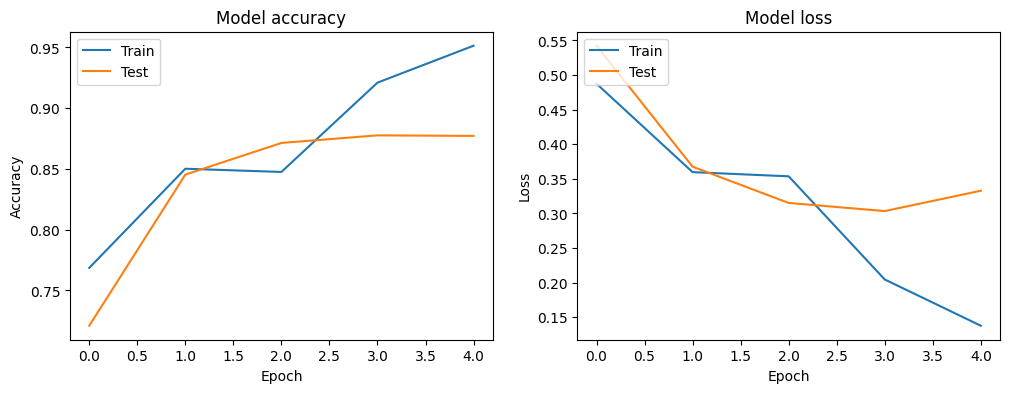

In [ ]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
